## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  57.272114  1336.857134  0.816960  8.743467  1.470003
1  63.771048   367.527695  0.311499  2.407919  0.938331
2   6.383055  1663.920725  0.152325  6.628384  1.469309
3  23.095195   368.356475  0.399034  1.045363  1.400776
4  18.171898  1612.996126  0.854487  8.235507  1.518870


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0027533	total: 53ms	remaining: 52.9s
1:	learn: 0.9913026	total: 53.5ms	remaining: 26.7s
2:	learn: 0.9820999	total: 54.5ms	remaining: 18.1s
3:	learn: 0.9734172	total: 55.1ms	remaining: 13.7s
4:	learn: 0.9618764	total: 56ms	remaining: 11.2s
5:	learn: 0.9515572	total: 56.8ms	remaining: 9.41s
6:	learn: 0.9392321	total: 57.4ms	remaining: 8.14s
7:	learn: 0.9283628	total: 57.9ms	remaining: 7.18s
8:	learn: 0.9176936	total: 58.4ms	remaining: 6.43s
9:	learn: 0.9061421	total: 59ms	remaining: 5.84s
10:	learn: 0.8967601	total: 59.5ms	remaining: 5.35s
11:	learn: 0.8872814	total: 60ms	remaining: 4.94s
12:	learn: 0.8781335	total: 61.1ms	remaining: 4.64s
13:	learn: 0.8689710	total: 61.7ms	remaining: 4.34s
14:	learn: 0.8584945	total: 62.2ms	remaining: 4.08s
15:	learn: 0.8478084	total: 62.6ms	remaining: 3.85s
16:	learn: 0.8383083	total: 63.2ms	remaining: 3.66s
17:	learn: 0.8278182	total: 63.7ms	remaining: 3.48s
18:	learn: 0.8209251	total: 64.5ms	remaining: 3.33s


62:	learn: 0.5232678	total: 87.8ms	remaining: 1.31s
63:	learn: 0.5184701	total: 88.5ms	remaining: 1.29s
64:	learn: 0.5133241	total: 89.1ms	remaining: 1.28s
65:	learn: 0.5085521	total: 89.7ms	remaining: 1.27s
66:	learn: 0.5031856	total: 90.1ms	remaining: 1.25s
67:	learn: 0.4985620	total: 90.6ms	remaining: 1.24s
68:	learn: 0.4947537	total: 91.5ms	remaining: 1.23s
69:	learn: 0.4902675	total: 92ms	remaining: 1.22s
70:	learn: 0.4858126	total: 92.4ms	remaining: 1.21s
71:	learn: 0.4814870	total: 92.7ms	remaining: 1.19s
72:	learn: 0.4775066	total: 93.2ms	remaining: 1.18s
73:	learn: 0.4723187	total: 93.4ms	remaining: 1.17s
74:	learn: 0.4689522	total: 93.8ms	remaining: 1.16s
75:	learn: 0.4646363	total: 94.2ms	remaining: 1.15s
76:	learn: 0.4608796	total: 94.6ms	remaining: 1.13s
77:	learn: 0.4576916	total: 94.9ms	remaining: 1.12s
78:	learn: 0.4535140	total: 95.3ms	remaining: 1.11s
79:	learn: 0.4493907	total: 95.8ms	remaining: 1.1s
80:	learn: 0.4454519	total: 96.3ms	remaining: 1.09s
81:	learn: 0.44

253:	learn: 0.1713266	total: 169ms	remaining: 496ms
254:	learn: 0.1707137	total: 170ms	remaining: 496ms
255:	learn: 0.1700781	total: 170ms	remaining: 495ms
256:	learn: 0.1696052	total: 171ms	remaining: 494ms
257:	learn: 0.1691149	total: 171ms	remaining: 492ms
258:	learn: 0.1687983	total: 172ms	remaining: 491ms
259:	learn: 0.1676407	total: 172ms	remaining: 490ms
260:	learn: 0.1670013	total: 172ms	remaining: 488ms
261:	learn: 0.1658224	total: 173ms	remaining: 486ms
262:	learn: 0.1652399	total: 173ms	remaining: 485ms
263:	learn: 0.1648465	total: 173ms	remaining: 483ms
264:	learn: 0.1642756	total: 174ms	remaining: 482ms
265:	learn: 0.1638229	total: 174ms	remaining: 480ms
266:	learn: 0.1633877	total: 175ms	remaining: 479ms
267:	learn: 0.1629562	total: 175ms	remaining: 478ms
268:	learn: 0.1623059	total: 175ms	remaining: 477ms
269:	learn: 0.1611478	total: 176ms	remaining: 475ms
270:	learn: 0.1600185	total: 176ms	remaining: 474ms
271:	learn: 0.1596043	total: 176ms	remaining: 472ms
272:	learn: 

449:	learn: 0.0755614	total: 248ms	remaining: 304ms
450:	learn: 0.0752573	total: 251ms	remaining: 305ms
451:	learn: 0.0747736	total: 252ms	remaining: 305ms
452:	learn: 0.0745541	total: 252ms	remaining: 304ms
453:	learn: 0.0742205	total: 252ms	remaining: 304ms
454:	learn: 0.0740071	total: 253ms	remaining: 303ms
455:	learn: 0.0736821	total: 253ms	remaining: 302ms
456:	learn: 0.0735064	total: 254ms	remaining: 301ms
457:	learn: 0.0732992	total: 254ms	remaining: 301ms
458:	learn: 0.0729835	total: 254ms	remaining: 300ms
459:	learn: 0.0728120	total: 255ms	remaining: 299ms
460:	learn: 0.0725038	total: 255ms	remaining: 298ms
461:	learn: 0.0723082	total: 256ms	remaining: 298ms
462:	learn: 0.0721093	total: 256ms	remaining: 297ms
463:	learn: 0.0719434	total: 256ms	remaining: 296ms
464:	learn: 0.0716441	total: 257ms	remaining: 296ms
465:	learn: 0.0712569	total: 257ms	remaining: 295ms
466:	learn: 0.0708832	total: 258ms	remaining: 294ms
467:	learn: 0.0706710	total: 258ms	remaining: 294ms
468:	learn: 

638:	learn: 0.0395143	total: 332ms	remaining: 188ms
639:	learn: 0.0393765	total: 333ms	remaining: 187ms
640:	learn: 0.0393059	total: 333ms	remaining: 187ms
641:	learn: 0.0392349	total: 334ms	remaining: 186ms
642:	learn: 0.0391081	total: 334ms	remaining: 185ms
643:	learn: 0.0389646	total: 335ms	remaining: 185ms
644:	learn: 0.0388532	total: 335ms	remaining: 184ms
645:	learn: 0.0387838	total: 335ms	remaining: 184ms
646:	learn: 0.0387278	total: 336ms	remaining: 183ms
647:	learn: 0.0385963	total: 336ms	remaining: 183ms
648:	learn: 0.0384380	total: 336ms	remaining: 182ms
649:	learn: 0.0383701	total: 337ms	remaining: 181ms
650:	learn: 0.0382727	total: 337ms	remaining: 181ms
651:	learn: 0.0381771	total: 338ms	remaining: 180ms
652:	learn: 0.0380407	total: 338ms	remaining: 180ms
653:	learn: 0.0378872	total: 338ms	remaining: 179ms
654:	learn: 0.0377379	total: 339ms	remaining: 178ms
655:	learn: 0.0376724	total: 339ms	remaining: 178ms
656:	learn: 0.0375789	total: 340ms	remaining: 177ms
657:	learn: 

688:	learn: 0.0337962	total: 414ms	remaining: 187ms
689:	learn: 0.0336781	total: 417ms	remaining: 187ms
690:	learn: 0.0335667	total: 418ms	remaining: 187ms
691:	learn: 0.0334591	total: 418ms	remaining: 186ms
692:	learn: 0.0333444	total: 419ms	remaining: 186ms
693:	learn: 0.0332360	total: 419ms	remaining: 185ms
694:	learn: 0.0331511	total: 420ms	remaining: 184ms
695:	learn: 0.0330392	total: 421ms	remaining: 184ms
696:	learn: 0.0329337	total: 421ms	remaining: 183ms
697:	learn: 0.0328303	total: 422ms	remaining: 182ms
698:	learn: 0.0327293	total: 467ms	remaining: 201ms
699:	learn: 0.0326265	total: 467ms	remaining: 200ms
700:	learn: 0.0325262	total: 468ms	remaining: 199ms
701:	learn: 0.0324195	total: 468ms	remaining: 199ms
702:	learn: 0.0323090	total: 469ms	remaining: 198ms
703:	learn: 0.0321848	total: 483ms	remaining: 203ms
704:	learn: 0.0320640	total: 485ms	remaining: 203ms
705:	learn: 0.0319536	total: 486ms	remaining: 202ms
706:	learn: 0.0318573	total: 486ms	remaining: 201ms
707:	learn: 

712:	learn: 0.0312067	total: 498ms	remaining: 200ms
713:	learn: 0.0310944	total: 498ms	remaining: 200ms
714:	learn: 0.0310006	total: 499ms	remaining: 199ms
715:	learn: 0.0308913	total: 500ms	remaining: 198ms
716:	learn: 0.0307996	total: 525ms	remaining: 207ms
717:	learn: 0.0306948	total: 525ms	remaining: 206ms
718:	learn: 0.0305905	total: 526ms	remaining: 205ms
719:	learn: 0.0305012	total: 526ms	remaining: 205ms
720:	learn: 0.0304134	total: 527ms	remaining: 204ms
721:	learn: 0.0303119	total: 528ms	remaining: 203ms
722:	learn: 0.0302234	total: 529ms	remaining: 203ms
723:	learn: 0.0301116	total: 530ms	remaining: 202ms
724:	learn: 0.0300085	total: 531ms	remaining: 201ms
725:	learn: 0.0299088	total: 532ms	remaining: 201ms
726:	learn: 0.0298224	total: 532ms	remaining: 200ms
727:	learn: 0.0297301	total: 533ms	remaining: 199ms
728:	learn: 0.0296306	total: 534ms	remaining: 198ms
729:	learn: 0.0295348	total: 534ms	remaining: 197ms
730:	learn: 0.0294515	total: 534ms	remaining: 197ms


731:	learn: 0.0293597	total: 538ms	remaining: 197ms
732:	learn: 0.0292535	total: 539ms	remaining: 196ms
733:	learn: 0.0291580	total: 541ms	remaining: 196ms
734:	learn: 0.0290711	total: 541ms	remaining: 195ms
735:	learn: 0.0289831	total: 541ms	remaining: 194ms
736:	learn: 0.0288910	total: 542ms	remaining: 193ms
737:	learn: 0.0288037	total: 543ms	remaining: 193ms
738:	learn: 0.0287179	total: 543ms	remaining: 192ms
739:	learn: 0.0286263	total: 543ms	remaining: 191ms
740:	learn: 0.0285281	total: 544ms	remaining: 190ms
741:	learn: 0.0284436	total: 544ms	remaining: 189ms
742:	learn: 0.0283658	total: 545ms	remaining: 188ms
743:	learn: 0.0282803	total: 545ms	remaining: 188ms
744:	learn: 0.0281977	total: 546ms	remaining: 187ms
745:	learn: 0.0281038	total: 546ms	remaining: 186ms
746:	learn: 0.0280094	total: 547ms	remaining: 185ms
747:	learn: 0.0279393	total: 547ms	remaining: 184ms
748:	learn: 0.0278593	total: 548ms	remaining: 184ms
749:	learn: 0.0277737	total: 548ms	remaining: 183ms
750:	learn: 

765:	learn: 0.0266383	total: 559ms	remaining: 172ms


766:	learn: 0.0265265	total: 559ms	remaining: 170ms
767:	learn: 0.0264562	total: 560ms	remaining: 169ms
768:	learn: 0.0264219	total: 560ms	remaining: 169ms
769:	learn: 0.0263246	total: 561ms	remaining: 168ms
770:	learn: 0.0262759	total: 561ms	remaining: 167ms
771:	learn: 0.0262433	total: 562ms	remaining: 166ms
772:	learn: 0.0261597	total: 562ms	remaining: 165ms
773:	learn: 0.0261267	total: 563ms	remaining: 165ms
774:	learn: 0.0260452	total: 564ms	remaining: 164ms
775:	learn: 0.0259928	total: 564ms	remaining: 163ms
776:	learn: 0.0259396	total: 565ms	remaining: 162ms
777:	learn: 0.0259077	total: 566ms	remaining: 162ms
778:	learn: 0.0258568	total: 566ms	remaining: 161ms
779:	learn: 0.0257733	total: 567ms	remaining: 160ms
780:	learn: 0.0257424	total: 569ms	remaining: 160ms
781:	learn: 0.0257116	total: 570ms	remaining: 159ms
782:	learn: 0.0256176	total: 572ms	remaining: 159ms
783:	learn: 0.0255132	total: 573ms	remaining: 158ms
784:	learn: 0.0254451	total: 574ms	remaining: 157ms
785:	learn: 

851:	learn: 0.0212984	total: 673ms	remaining: 117ms
852:	learn: 0.0212086	total: 674ms	remaining: 116ms
853:	learn: 0.0211060	total: 674ms	remaining: 115ms
854:	learn: 0.0210071	total: 675ms	remaining: 115ms
855:	learn: 0.0209156	total: 675ms	remaining: 114ms
856:	learn: 0.0208202	total: 676ms	remaining: 113ms
857:	learn: 0.0207308	total: 676ms	remaining: 112ms
858:	learn: 0.0206834	total: 676ms	remaining: 111ms
859:	learn: 0.0206312	total: 677ms	remaining: 110ms
860:	learn: 0.0205403	total: 677ms	remaining: 109ms
861:	learn: 0.0204942	total: 677ms	remaining: 109ms
862:	learn: 0.0204084	total: 678ms	remaining: 108ms
863:	learn: 0.0203578	total: 679ms	remaining: 107ms
864:	learn: 0.0203108	total: 679ms	remaining: 106ms
865:	learn: 0.0202492	total: 679ms	remaining: 105ms
866:	learn: 0.0201999	total: 680ms	remaining: 104ms
867:	learn: 0.0201456	total: 680ms	remaining: 104ms


868:	learn: 0.0200868	total: 681ms	remaining: 103ms
869:	learn: 0.0200261	total: 681ms	remaining: 102ms
870:	learn: 0.0199884	total: 681ms	remaining: 101ms
871:	learn: 0.0199104	total: 682ms	remaining: 100ms
872:	learn: 0.0198041	total: 682ms	remaining: 99.4ms
873:	learn: 0.0197827	total: 683ms	remaining: 98.5ms
874:	learn: 0.0197065	total: 683ms	remaining: 97.7ms
875:	learn: 0.0196661	total: 683ms	remaining: 96.8ms
876:	learn: 0.0195915	total: 684ms	remaining: 96ms
877:	learn: 0.0195707	total: 684ms	remaining: 95.2ms
878:	learn: 0.0194957	total: 684ms	remaining: 94.3ms
879:	learn: 0.0193947	total: 685ms	remaining: 93.5ms
880:	learn: 0.0193227	total: 685ms	remaining: 92.7ms
881:	learn: 0.0193023	total: 686ms	remaining: 91.9ms
882:	learn: 0.0192822	total: 687ms	remaining: 91.1ms
883:	learn: 0.0192118	total: 687ms	remaining: 90.2ms
884:	learn: 0.0191440	total: 688ms	remaining: 89.4ms
885:	learn: 0.0190750	total: 688ms	remaining: 88.6ms
886:	learn: 0.0190073	total: 688ms	remaining: 87.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4071838251895358


ABC Pre-generator MAE 0.34887583097499014


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

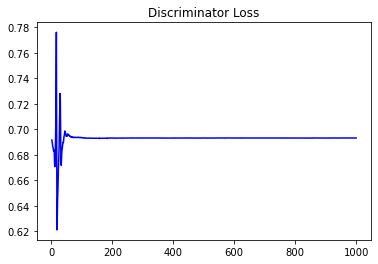

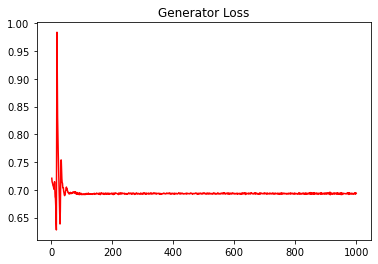

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.38561814443022013


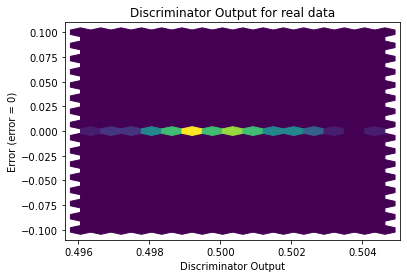

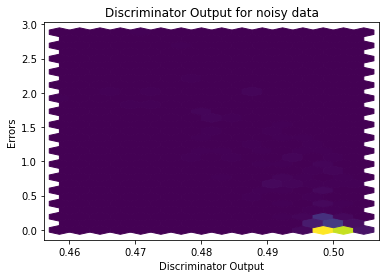

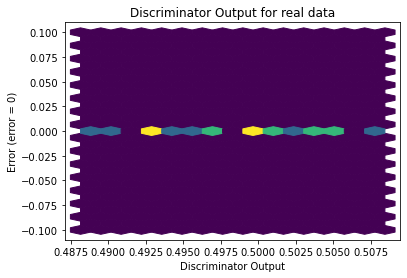

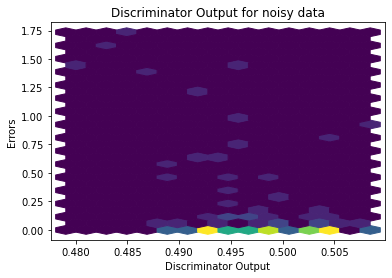

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

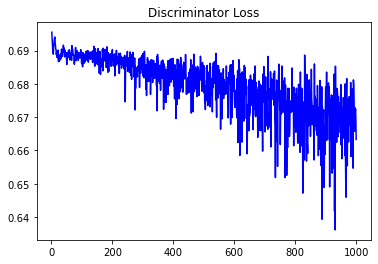

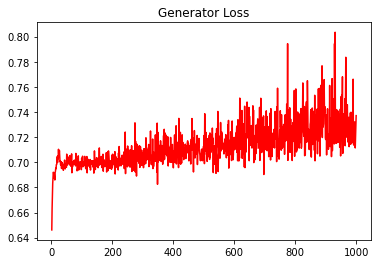

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.43051348587870597


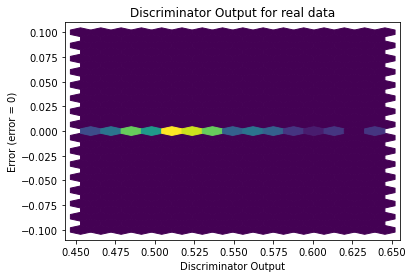

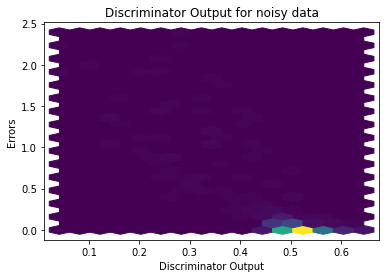

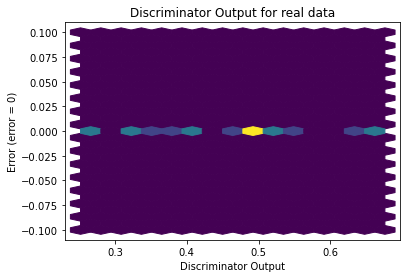

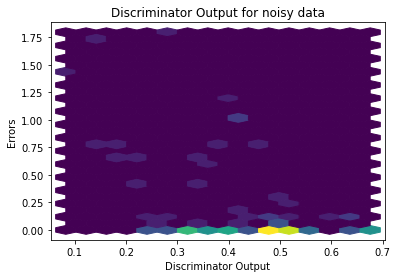

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


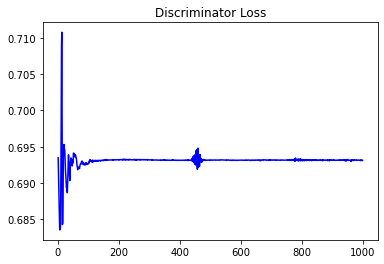

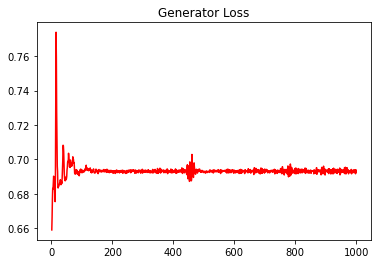

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4222309142649174


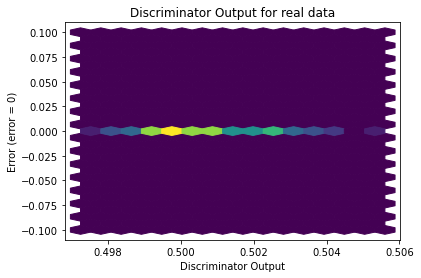

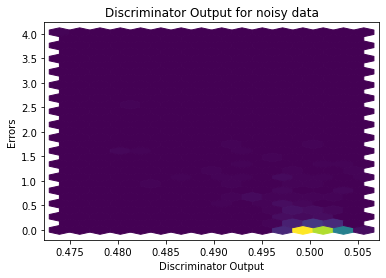

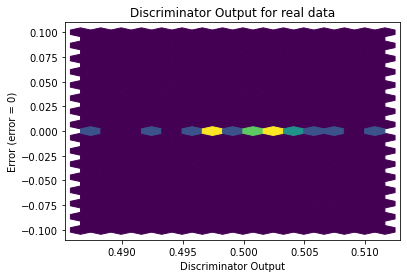

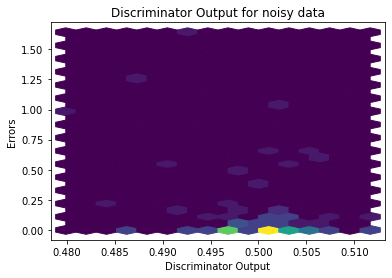

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


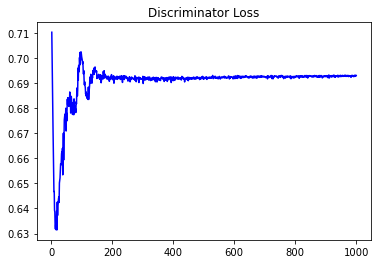

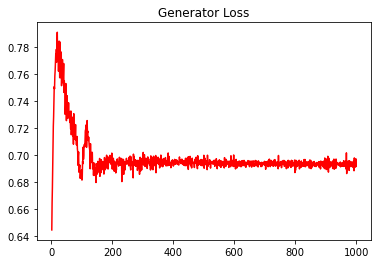

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.41342272351309656


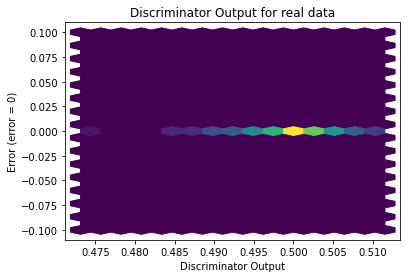

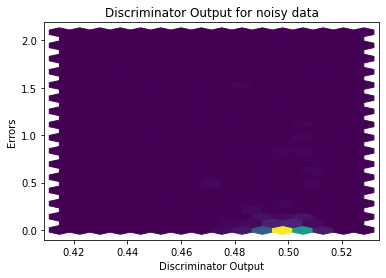

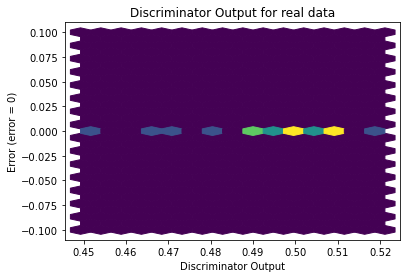

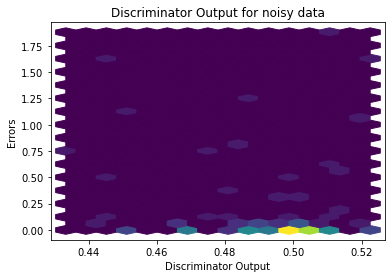

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5785]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0867]], requires_grad=True)
